<a href="https://colab.research.google.com/github/licciard/fun-stuff/blob/main/math/lambdas_dividetoconquer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modules

In [112]:
import sympy
import mpmath
import numpy as np
mpmath.mp.dps = 15
print(mpmath.mp)
#sympy.init_session()
sympy.init_printing(use_latex=False)
import scipy.special as scp
import scipy.optimize as opt

import matplotlib.pyplot as plt
%matplotlib inline

Mpmath settings:
  mp.prec = 53                [default: 53]
  mp.dps = 15                 [default: 15]
  mp.trap_complex = False     [default: False]


Integral complex number

In [3]:
n = 2

def lambda_integrand(t):
  theta = mpmath.exp(t*mpmath.j)
  return mpmath.log(theta*mpmath.zeta(1+theta))*mpmath.power(theta,-n)*mpmath.power(1+theta,n-1)

for n in range(1,25):
  print("{} --> {}".format(n,n*mpmath.quad(lambda_integrand,[0,mpmath.pi])/(mpmath.pi)))

1 --> (0.577215664901533 - 0.0605130163441739j)
2 --> (0.966885096962701 - 0.833620186083389j)
3 --> (1.2206969282167 - 2.14743286757246j)
4 --> (1.37558813187126 - 4.3615283810059j)
5 --> (1.45826850019717 - 8.25650393681165j)
6 --> (1.48829832721222 - 15.3896196382937j)
7 --> (1.48019084023884 - 28.8264899674144j)
8 --> (1.44485574411943 - 54.5981445042457j)
9 --> (1.3905964067913 - 104.590598006883j)
10 --> (1.32380368369629 - 202.275641506803j)
11 --> (1.24944277582208 - 394.085136674032j)
12 --> (1.17139824693906 - 772.004471537845j)
13 --> (1.09272131711462 - 1518.48372224896j)
14 --> (1.01580941259033 - 2995.76782936648j)
15 --> (0.942538421086352 - 5923.67426621112j)
16 --> (0.874361661380814 - 11733.5575171478j)
17 --> (0.812385212605197 - 23273.3576028421j)
18 --> (0.757426282975166 - 46212.4593617463j)
19 --> (0.710059274375477 - 91841.8486797339j)
20 --> (0.670652812798627 - 182656.902878093j)
21 --> (0.639400059775679 - 363490.753607108j)
22 --> (0.616343958428758 - 723721

Integration by parts

In [4]:
mpmath.mp.dps = 15

def log_zeta_real(t):
  theta = mpmath.exp(t*mpmath.j)
  zetat = mpmath.zeta(1+theta)
  rz = mpmath.fabs(zetat)
  #value = (mpmath.log(rz)*mpmath.cos((n+1)*t/2))*mpmath.power(2*mpmath.cos(t/2),n-1)
  value = mpmath.log(rz)
  return value

def log_zeta_imag(t):
  theta = mpmath.exp(t*mpmath.j)
  zetat = mpmath.zeta(1+theta)
  az = mpmath.arg(zetat)
  at = mpmath.arg(theta)
  #value = ((at + az) * mpmath.sin((n+1)*t/2))*mpmath.power(2*mpmath.cos(t/2),n-1)
  value = (at + az) 
  return value

def log_zeta(t):
  theta = mpmath.exp(t*mpmath.j)
  zetat = mpmath.zeta(1+theta)
  return mpmath.log(theta*zetat)

Nt = 2000
dt = np.arange(-mpmath.pi,mpmath.pi,2*mpmath.pi/Nt)

zeta_real = [log_zeta_real(t) for t in dt]
zeta_imag = [log_zeta_imag(t) for t in dt]
zeta_both_real = [mpmath.re(log_zeta(t)) for t in dt]
zeta_both_imag = [mpmath.im(log_zeta(t)) for t in dt]


In [5]:
dzeta_both = [mpmath.diff(log_zeta,t) for t in dt]
dzeta_both_real = [mpmath.re(z) for z in dzeta_both]
dzeta_both_imag = [mpmath.im(z) for z in dzeta_both]

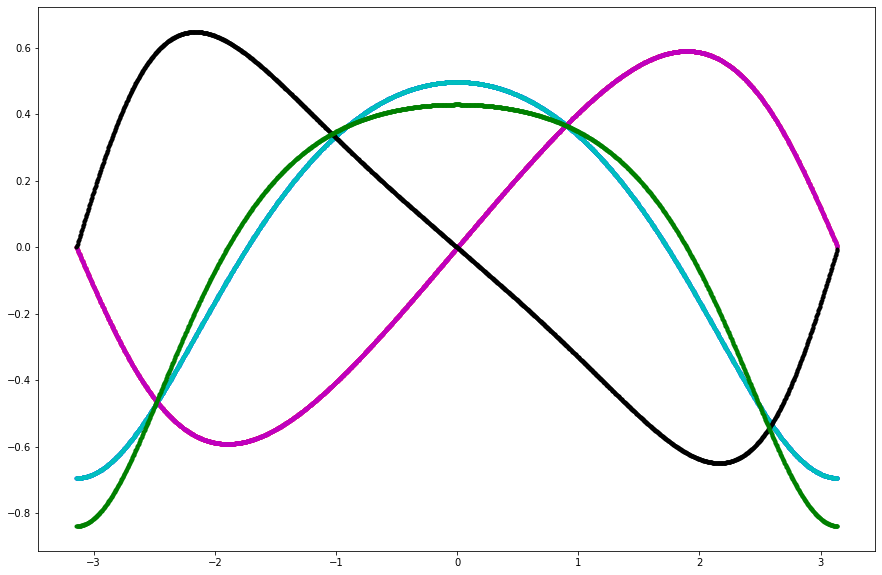

In [8]:
plt.figure(figsize=(15,10))
plt.plot(dt, zeta_real, 'b.')
plt.plot(dt, zeta_imag, 'r.')
plt.plot(dt, zeta_both_real, 'c.')
plt.plot(dt, zeta_both_imag, 'm.')

plt.plot(dt, dzeta_both_real, 'k.')
plt.plot(dt, dzeta_both_imag, 'g.')

#plt.plot(dn,mypow(dn,*popt),'r-')
#plt.xscale('log')
#plt.yscale('log')
axes = plt.gca()
#axes.set_xlim([2020,2060])
#axes.set_ylim([-10,10])

plt.show()

In [7]:
def part_integrand_12(t):
  return mpmath.re(mpmath.diff(log_zeta,t))*mpmath.power(2*mpmath.cos(t/2),n)*mpmath.sin(n*t/2)

def part_integrand_3(t):
  return mpmath.im(log_zeta(t))*mpmath.power(2*mpmath.cos(t/2),n)*mpmath.sin(n*t/2)

def part_integrand_4(t):
  return mpmath.im(mpmath.diff(log_zeta,t))*mpmath.power(2*mpmath.cos(t/2),n)*mpmath.cos(n*t/2)

mpmath.mp.dps = 15
for n in range(1,15):
  #print("{} --> {}".format(n,n*mpmath.quad(lambda_integrand_rlarge,[0,2*mpmath.pi])/(2*mpmath.pi)))
  coef124 = -2/(2*mpmath.pi*n)
  coef3 = 2/(2*mpmath.pi)
  i12 = coef124 * mpmath.quad(part_integrand_12,[0,mpmath.pi])
  i3 = coef3 * mpmath.quad(part_integrand_3,[0,mpmath.pi])
  i4 = coef124 * mpmath.quad(part_integrand_4,[0,mpmath.pi])
  tot = i12+i3+i4
  print("{}: {} + {} + {} = {}".format(n,i12,i3,i4,n*(i12-i4)))


1: 0.288607832450766 + 0.288607832450766 + -0.288607832450766 = 0.577215664901533
2: 0.241721274240675 + 0.530329106691442 + -0.241721274240675 = 0.966885096962701
3: 0.203449488036116 + 0.733778594727557 + -0.203449488036116 = 1.2206969282167
4: 0.171948516483907 + 0.905727111211465 + -0.171948516483907 = 1.37558813187126
5: 0.145826850019717 + 1.05155396123118 + -0.145826850019717 = 1.45826850019717
6: 0.124024860601018 + 1.1755788218322 + -0.124024860601018 = 1.48829832721222
7: 0.105727917159917 + 1.28130673899212 + -0.105727917159917 = 1.48019084023884
8: 0.0903034840074645 + 1.37161022299958 + -0.0903034840074645 = 1.44485574411943
9: 0.0772553559328498 + 1.44886557893243 + -0.0772553559328498 = 1.3905964067913
10: 0.0661901841848147 + 1.51505576311725 + -0.0661901841848147 = 1.32380368369629
11: 0.0567928534464583 + 1.5718486165637 + -0.0567928534464583 = 1.24944277582208
12: 0.0488082602891276 + 1.62065687685283 + -0.0488082602891276 = 1.17139824693906
13: 0.0420277429659469 + 

Evaluate the derivative of the log Zeta function between 0 and 2 using the Dirichlet eta function.

In [88]:
def eta_corrterm(t):
  theta = mpmath.exp(t*mpmath.j)
  return -mpmath.log(mpmath.fabs(1-mpmath.power(2,-theta)))

def loggamma_term(t):
  theta = mpmath.exp(t*mpmath.j)
  #thetabar = mpmath.exp(-t*mpmath.j)
  #return -(mpmath.loggamma(1+theta)+mpmath.loggamma(1+thetabar))/2
  return -mpmath.log(mpmath.fabs(mpmath.gamma(1+theta)))

def integral_term(t):
  theta = mpmath.exp(t*mpmath.j)
  integral = mpmath.quad(lambda x:mpmath.power(x,theta)/(1+mpmath.exp(x)),[0,100])
  return mpmath.log(mpmath.fabs(integral))

def logzeta_re(t):
  return eta_corrterm(t)  + loggamma_term(t) +integral_term(t)

In [91]:
Nt = 100 #0
dt = np.arange(0,mpmath.pi,2*mpmath.pi/Nt)

azeta_both_real = [mpmath.re(log_zeta(t)) for t in dt]
azeta_both_imag = [mpmath.im(log_zeta(t)) for t in dt]

zetasum_both = [logzeta_re(t) for t in dt]
zetasum_both_real = [mpmath.re(z) for z in dzetasum_both]

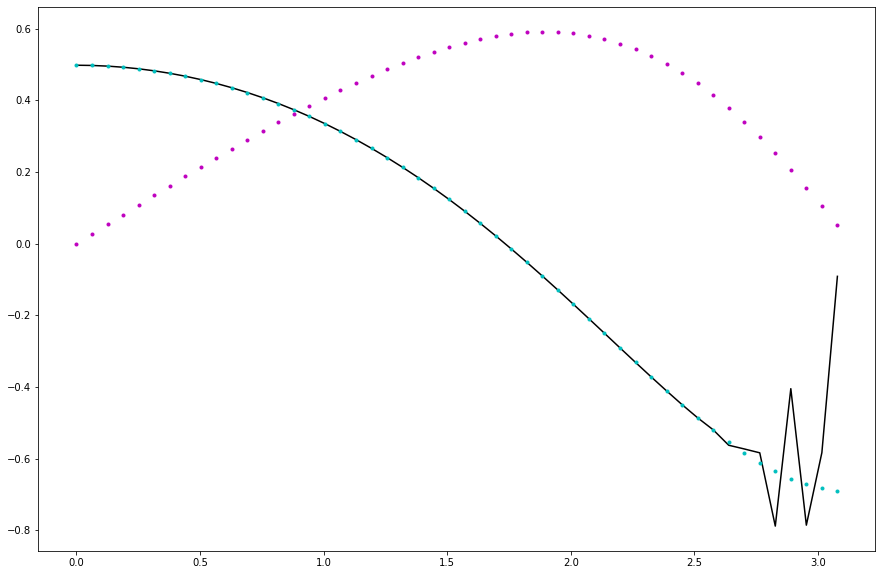

In [92]:
plt.figure(figsize=(15,10))

plt.plot(dt, zetasum_both_real, 'k-')
#plt.plot(dt, dzetasum_both_imag, 'g.')
plt.plot(dt, azeta_both_real, 'c.')
plt.plot(dt, azeta_both_imag, 'm.')

axes = plt.gca()

plt.show()

In [84]:
mpmath.mp.dps = 15
for n in range(1,25):
  #print("{} --> {}".format(n,n*mpmath.quad(lambda_integrand_rlarge,[0,2*mpmath.pi])/(2*mpmath.pi)))
  coef124 = -2/(mpmath.pi)
  i12 = coef124 * mpmath.quad(part_integrand_12,[0,mpmath.pi])
  i12part = coef124 * mpmath.quad(part_integrand_12,[0,mpmath.pi*0.7])
  print("{}: {} vs {}".format(n,i12, i12part-i12))

1: 0.577215664901533 vs -0.13939108314663
2: 0.966885096962701 vs -0.0648166323618752
3: 1.2206969282167 vs 0.0279163314579423
4: 1.37558813187126 vs 0.0506352454293701
5: 1.45826850019717 vs 0.0171945649705567
6: 1.48829832721222 vs -0.0185227610074943
7: 1.48019084023884 vs -0.0236203419883791
8: 1.44485574411943 vs -0.00494206813676135
9: 1.3905964067913 vs 0.0120103072161752
10: 1.32380368369629 vs 0.0121750720755651
11: 1.24944277582208 vs 0.00081333498658509
12: 1.17139824693906 vs -0.0078769389079274
13: 1.09272131711462 vs -0.00653742966373261
14: 1.01580941259034 vs 0.000641286119982709
15: 0.942538421086364 vs 0.00520286157751537
16: 0.874361661380838 vs 0.00354068427820975
17: 0.812385212605248 vs -0.00107072805019204
18: 0.757426282975275 vs -0.00344060203041607
19: 0.710059274375649 vs -0.00188638792538576
20: 0.670652812798991 vs 0.00109028189413451
21: 0.639400059776443 vs 0.00226682540712519
22: 0.616343958430358 vs 0.000960262026786896
23: 0.601398606428315 vs -0.00095

In [107]:
Nt = 200 #0
dt = np.arange(0,0.9*mpmath.pi,2*mpmath.pi/Nt)

adzeta_both = [mpmath.diff(log_zeta,t) for t in dt]
adzeta_both_real = [mpmath.re(z) for z in adzeta_both]

dzetasum_both = [mpmath.diff(logzeta_re,t) for t in dt]
dzetasum_both_real = [mpmath.re(z) for z in dzetasum_both]

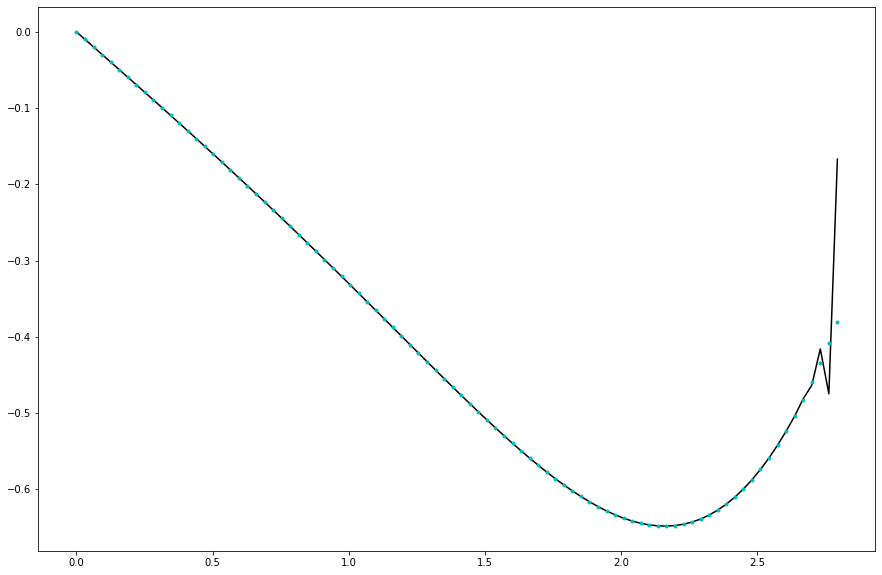

In [108]:
plt.figure(figsize=(15,10))

plt.plot(dt, dzetasum_both_real, 'k-')
#plt.plot(dt, dzetasum_both_imag, 'g.')
plt.plot(dt, adzeta_both_real, 'c.')

axes = plt.gca()

plt.show()

In [111]:
def part_integrand_re_etacorr(t):
  return mpmath.diff(eta_corrterm,t)*mpmath.power(2*mpmath.cos(t/2),n)*mpmath.sin(n*t/2)

def part_integrand_re_loggamma(t):
  return mpmath.diff(loggamma_term,t)*mpmath.power(2*mpmath.cos(t/2),n)*mpmath.sin(n*t/2)

def part_integrand_re_integral(t):
  return mpmath.diff(integral_term,t)*mpmath.power(2*mpmath.cos(t/2),n)*mpmath.sin(n*t/2)

mpmath.mp.dps = 15
for n in range(1,25):
  #print("{} --> {}".format(n,n*mpmath.quad(lambda_integrand_rlarge,[0,2*mpmath.pi])/(2*mpmath.pi)))
  coef = -2/(mpmath.pi)
  i1 = coef *mpmath.quad(part_integrand_re_etacorr,[0,0.7*mpmath.pi])
  i2 = coef *mpmath.quad(part_integrand_re_loggamma,[0,0.7*mpmath.pi])
  i3 = coef *mpmath.quad(part_integrand_re_integral,[0,0.7*mpmath.pi])
  itot = coef * mpmath.quad(part_integrand_12,[0,0.7*mpmath.pi])
  print("{}: {} + {} + {} = {} vs {}".format(n,i1,i2,i3,i1+i2+i3,itot))

1: 0.286094251772918 + -0.107945123022719 + 0.259675453004703 = 0.437824581754903 vs 0.437824581754903
2: 0.623861604101177 + -0.687391681779842 + 0.96559854227949 = 0.902068464600825 vs 0.902068464600825
3: 0.931850742603137 + -1.90089853543142 + 2.21766105250292 = 1.24861325967464 vs 1.24861325967464
4: 1.16958320669922 + -3.69774006796639 + 3.9543802385678 = 1.42622337730063 vs 1.42622337730063
5: 1.34227920611289 + -5.88094402390446 + 6.01412788295929 = 1.47546306516772 vs 1.47546306516772
6: 1.47521103104743 + -8.25006778165353 + 8.24463231681082 = 1.46977556620472 vs 1.46977556620472
7: 1.58531760301833 + -10.7051299031304 + 10.5763827983625 = 1.45657049825046 vs 1.45657049825046
8: 1.67142612060808 + -13.2512754378759 + 13.0197629932505 = 1.43991367598267 vs 1.43991367598267
9: 1.7235064194526 + -15.9319444720045 + 15.6110447665594 = 1.40260671400747 vs 1.40260671400747
10: 1.73639988100105 + -18.7631743922676 + 18.3627532670384 = 1.33597875577186 vs 1.33597875577186
11: 1.71479

KeyboardInterrupt: ignored

In [138]:
Nt = 250 #0
dt = np.arange(0,0.67*mpmath.pi,2*mpmath.pi/Nt)

diff_etacorr = [mpmath.diff(eta_corrterm,t) for t in dt]
diff_loggamma = [mpmath.diff(loggamma_term,t) for t in dt]
diff_integral = [-mpmath.diff(integral_term,t) for t in dt]
diff_logintsum = [t1-t2 for t1,t2 in zip(diff_loggamma,diff_integral)]


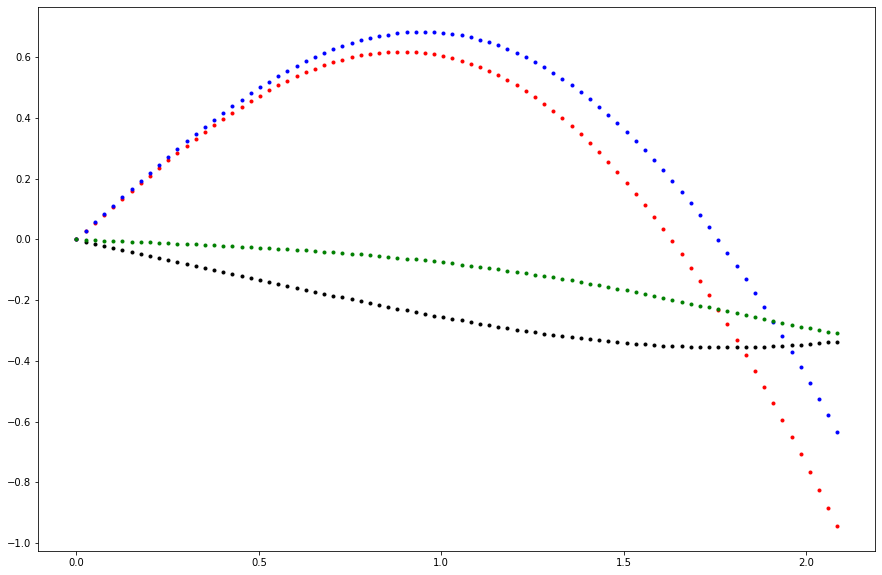

In [139]:
plt.figure(figsize=(15,10))

plt.plot(dt, diff_etacorr  , 'k.')
plt.plot(dt, diff_loggamma, 'r.')
plt.plot(dt, diff_integral, 'b.')
plt.plot(dt, diff_logintsum, 'g.')

axes = plt.gca()

plt.show()

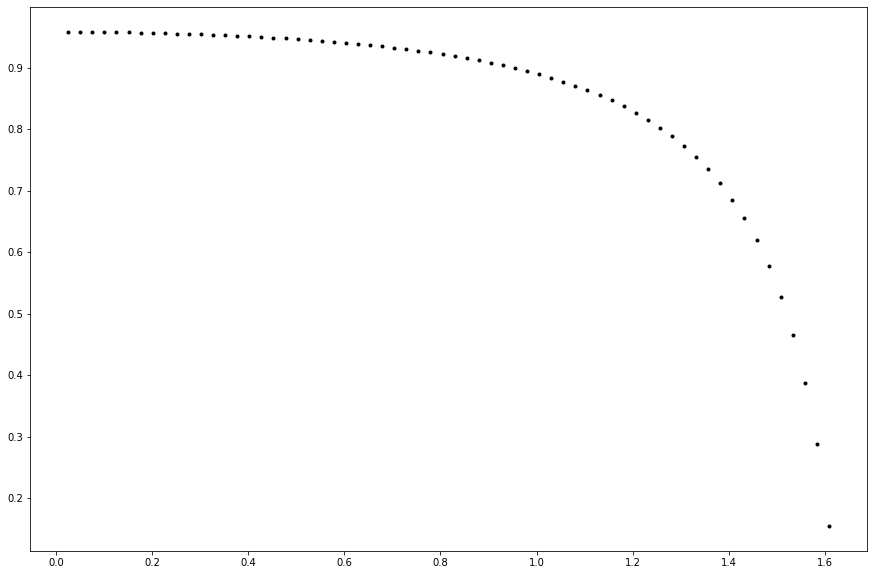

In [133]:
plt.figure(figsize=(15,10))

adiff_etacorr = np.array(diff_etacorr[1:65])
adiff_loggamma = np.array(diff_loggamma[1:65])
adiff_integral = np.array(diff_integral[1:65])
adiff_ratio = adiff_loggamma/adiff_integral

plt.plot(dt[1:65], adiff_ratio, 'k.')

axes = plt.gca()

plt.show()